# Simple Logistic Regression Model

This notebook serves as a guide to generate Logistic Regression Model and deploy it in production environment. I use this notebook as a template in my Data Science Projects.

<ul>
<li>Data Gathering</li>
<li>Data Exploration</li>
<li>Model Generation</li>
<li>Model Validation</li>
<li>Embedding Learning Model in Web API</li>
</ul>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
#sns.set(style="whitegrid", context='notebook', color_codes=True)

from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

## Data Gathering

In this example, we will use prepared data from University of California machine learning repository for simplicity purposes.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
df = pd.read_csv(url, names=names)

Take a sneek peak of what the data looks like! Use <b>head()</b> or <b>tail()</b> methods to view few items of your data.

In [3]:
df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Data Exploration 

First, CHECK if there are missing values in your data.

In [4]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


By invoking <b>describe</b> method, it will display the <b>count</b>, <b>mean</b>, <b>std</b>, <b>min</b>, <b>max</b> and <b>percentiles</b>.
Since all our column counts are equal, that implies we don't have missing data.


><i>NOTE: In real world application, you will encounter a lot of missing and unsanitized data. You will spend 80% of your time in extracting and transforming your data.</i>

In [5]:
df.shape

(768, 9)

`shape` returns the number of rows and columns of our dataframe. `(768,9)` implies that we have 768 samples and 9 features in our dataset.

## Model Generation

Since our goal in this example is to predict the class of the diabetes for a given attributes of the patient. That means `class` column is our target value and the rest of the columns are our features.

In [6]:
X = df.values[:, 0:8] # Let X be the matrix of our features

In [7]:
y = df.values[:, 8] # Let y be the matrix of the target value

Split the dataset into training data and test data. We use `train_test_split` method from `cross_validation` library to split the data. I use 25% of the data as test data and 75% as training data.

In [8]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

### Fitting the training data into the LogisticRegression model.

In [9]:
model = LogisticRegression() # for simplicity purposes, we will not be doing parameter tuning
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Model Validation

In [10]:
score = model.score(X_test, y_test)
print(score)

0.744791666667


The <i>score</i> would determine how accurate your model.
In this case, we are <b>74.48%</b> confident that our model will determine the value of `class` correctly. 

<b>Confusion Matrix</b>

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[108  12]
 [ 37  35]]


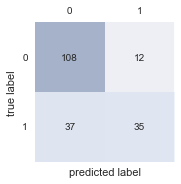

In [15]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.grid()
plt.show()

Let's assume that class 1(malignant) is the positive class in this example, our model correctly classified 108 of the samples that belong to class 0(false negatives) and 35 samples that belong to class 1(true positives), respectively. However, our model also incorrectly misclassified 12 samples from class 0 as class 1(false negatives), and it predicted that 37 samples are class 1 although it is a class 0(false positive).

## Embedding Machine Learning Model into a Web API

### First, save the model into a pickle object.

In [16]:
filename = "pickle_objects/diabetes_model.pkl"
pickle.dump(model, open(filename, 'wb'))

### Second, create a very simple web API using Flask.

You can copy the code snippet below and save the file under app.py.
To deploy the web API, simply execute this command <b>python app.py</b> in your terminal.

In [ ]:
from flask import request, url_for
from flask_api import FlaskAPI, status, exceptions

import pickle
import os
import numpy as np

app = FlaskAPI(__name__)
curr_dir = os.path.dirname(__file__)
clf = pickle.load(open(os.path.join(curr_dir, 'diabetes_model.sav'), 'rb'))

@app.route("/", methods=['GET']) 
def home():
    return {'hello': 'world'}


@app.route("/predict", methods=['POST']) # this is the endpoint we use to predict the diabetes class
def predict():
    data = [ float(request.data['preg']),
             float(request.data['plas']),
             float(request.data['pres']),
             float(request.data['skin']),
             float(request.data['test']),
             float(request.data['mass']),
             float(request.data['pedi']),
             float(request.data['age'])
            ]

    m = clf.predict(data)[0]
    return {'prediction': m}

if __name__ == "__main__":
    app.run(debug=True)


Hurrah! We are done!

### Testing your API endpoint

curl -X POST --data "preg=0&plas=137&pres=40&skin=35&test=168&mass=43.1&pedi=2.288&age=33" "http://localhost:5000/predict"

It should return `{"prediction": 1.0}`

## Conclusion

In this notebook, you learned about gathering, exploring and fitting the data into Logistic Regression. Although, it discussed only the basics, this notebook is a good start to improve your learning model.

## What's Next?

